<a href="https://colab.research.google.com/github/JontyDutta/Web-Scraping-Data-Handling/blob/main/Web_Scraping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**


### **Tasks:**JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.


**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content


## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
# Set the main website URL
main_website_url = r'https://www.justwatch.com'

# Find all <a> tags with the specified class
movies_link = soup.find_all('a', class_="title-list-grid__item--link")

# Initialize an empty list to store complete movie URLs
list_of_movies_links = []

# Iterate through each <a> tag in the list
for link in movies_link:
    # Extract the value of the href attribute (movie URL)
    movie_url = link.get('href')

    # Combine the main website URL with the movie URL and append to the list
    list_of_movies_links.append(main_website_url + movie_url)

# Print the list of complete movie URLs
print(list_of_movies_links)


## **Scrapping Movie Title**

In [ ]:
# Write Your Code here

# Initialize an empty list to store movie titles
list_of_movies_title = []

# Iterate through each movie link in the list (list_of_movies_links)
for link in list_of_movies_links:
    # Set the current URL
    url_from_list = link

    # Sending an HTTP GET request to the URL
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the movie title (assuming it's in an <h1> tag)
    movie_title = soup.find('h1')

    # Check if the <h1> tag is found
    if movie_title:
        # Append the text content of the <h1> tag to the list
        list_of_movies_title.append(movie_title.text.strip())
    else:
        # If <h1> tag is not found, add a placeholder to the list
        list_of_movies_title.append(f"Title not found for {url}")

# Print the list of extracted movie titles
print(list_of_movies_title)


## **Scrapping release Year**

In [ ]:
# Write Your Code here
# Initialize an empty list to store release years
list_of_release_years = []

# Iterate through each movie link in the list (list_of_movies_links)
for link in list_of_movies_links:
    # Set the current URL
    url_of_movie = link

    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(url_of_movie)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the release year which is in <span class="text-muted"> on the movie's page
        release_year_tag = soup.find('span', class_="text-muted")

        # Check if the <span> tag is found
        if release_year_tag:
            # Extract the text content of the <span> tag and replace parentheses with an empty string
            release_year = release_year_tag.text.replace('(', '').replace(')', '').strip()
            list_of_release_years.append(release_year)
        else:
            # If <span> tag is not found, add a placeholder to the list
            list_of_release_years.append(f"Release year not found for {url_of_movie}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_of_movie}: {req_ex}")
        list_of_release_years.append(f"Error fetching {url_of_movie}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_of_movie}: {ex}")
        list_of_release_years.append(f"Error processing {url_of_movie}")

# Print the list of extracted release years without parentheses
print(list_of_release_years)


## **Scrapping Genres**

In [ ]:
# Write Your Code here
# Initialize an empty list to store genres
list_of_genres = []

# Iterate through each movie link in the list (list_of_movies_links)
for link in list_of_movies_links:
    # Set the current URL
    url_of_movie = link

    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(url_of_movie)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the <h3> tag containing "Genres"
        genres_heading = soup.find('h3', class_="detail-infos__subheading", string="Genres")

        # Check if the <h3> tag is found
        if genres_heading:
            # Extract the next sibling <div> tag (which contains the genres)
            genres_div = genres_heading.find_next('div', class_="detail-infos__value")
            if genres_div:
                # Extract the text content of the <div> tag and strip extra whitespaces
                genres = genres_div.text.strip()
                list_of_genres.append(genres)
            else:
                list_of_genres.append(f"Genres not found for {url_of_movie}")
        else:
            list_of_genres.append(f"Genres heading not found for {url_of_movie}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_of_movie}: {req_ex}")
        list_of_genres.append(f"Error fetching {url_of_movie}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_of_movie}: {ex}")
        list_of_genres.append(f"Error processing {url_of_movie}")

# Print the list of extracted genres
print(list_of_genres)


## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
# Initialize an empty list to store ratings
list_of_ratings = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the img tag with alt attribute 'IMDB'
        imdb_img = soup.find('img', alt=re.compile(r'IMDB'))

        if imdb_img:
            # Extract IMDb rating from the following sibling span
            imdb_rating_span = imdb_img.find_next('span')
            imdb_rating = re.search(r'\d+\.\d+', imdb_rating_span.get_text()).group()
            list_of_ratings.append(imdb_rating)
        else:
            list_of_ratings.append("IMDb Rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_ratings.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_ratings.append(f"Error processing {link}")

# Print the list of extracted IMDb ratings
print(list_of_ratings)

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here

# Initialize an empty list to store runtimes
list_of_runtimes = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the <h3> tag containing "Runtime"
        runtime_heading = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

        if runtime_heading:
            # Extract the runtime from the following sibling div
            runtime_div = runtime_heading.find_next('div', class_='detail-infos__value')
            runtime = runtime_div.get_text(strip=True)
            list_of_runtimes.append(runtime)
        else:
            list_of_runtimes.append("Runtime not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_runtimes.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_runtimes.append(f"Error processing {link}")

# Print the list of extracted runtimes
print(list_of_runtimes)


## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
# Initialize an empty list to store age ratings
list_of_age_ratings = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the h3 tag with class 'detail-infos__subheading' and text 'Age rating'
        age_rating_heading = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

        if age_rating_heading:
            # Extract age rating from the following sibling div
            age_rating = age_rating_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_age_ratings.append(age_rating)
        else:
            list_of_age_ratings.append("Age rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_age_ratings.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_age_ratings.append(f"Error processing {link}")

# Print the list of extracted age ratings
print(list_of_age_ratings)



## **Fetching Production Countries Details**

In [ ]:
import re

# Initialize an empty list to store production countries
list_of_production_countries = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the h3 tag with class 'detail-infos__subheading' and text 'Production country'
        production_country_heading = soup.find('h3', class_='detail-infos__subheading', string=re.compile(r'Production\s*country', re.I))

        if production_country_heading:
            # Extract production country from the following sibling div
            production_country = production_country_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_production_countries.append(production_country)
        else:
            list_of_production_countries.append("Production country not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_production_countries.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_production_countries.append(f"Error processing {link}")

# Print the list of extracted production countries
print(list_of_production_countries)


## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store streaming services
list_of_streaming_services = []
# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the streaming service icon based on the class 'offer__icon'
        streaming_service_icon = soup.find('img', class_='offer__icon')

        if streaming_service_icon:
            # Extract the alt attribute from the streaming service icon
            streaming_service_alt = streaming_service_icon['alt']
            list_of_streaming_services.append(streaming_service_alt)
        else:
            list_of_streaming_services.append("Streaming services not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_streaming_services.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_streaming_services.append(f"Error processing {link}")

# Print the list of extracted streaming service information
print(list_of_streaming_services)


## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd

# Create a dictionary to store movie data
dic_for_movies_data_frame = {
    "Movie Name": list_of_movies_title,
    "Release Year": list_of_release_years,
    "Rating": list_of_ratings,
    "Runtime": list_of_runtimes,
    "Streaming Service": list_of_streaming_services,
    "Genre": list_of_genres,
    "Age Rating": list_of_age_ratings,
    "Production Countries": list_of_production_countries,
    "Movie Page Link": list_of_movies_links
}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(dic_for_movies_data_frame)

# Display the first few rows of the DataFrame
movies_dataframe.head()


,Movie Name,Release Year,Rating,Runtime,Streaming Service,Genre,Age Rating,Production Countries,Movie Page Link
0,Animal (2023),2023,6.3,3h 21min,Netflix,"Action & Adventure, Drama, Crime, Mystery & Th...",A,India,https://www.justwatch.com/in/movie/animal-2022
1,Salaar (2023),2023,6.5,2h 55min,Netflix,"Drama, Mystery & Thriller, Action & Adventure,...",A,India,https://www.justwatch.com/in/movie/salaar
2,12th Fail (2023),2023,9.1,2h 26min,Hotstar,Drama,Age rating not found,India,https://www.justwatch.com/in/movie/12th-fail
3,Dunki (2023),2023,6.9,2h 40min,Netflix,"Drama, Comedy",Age rating not found,India,https://www.justwatch.com/in/movie/dunki
4,Sam Bahadur (2023),2023,7.8,2h 30min,Zee5,"Drama, War & Military, History",UA,India,https://www.justwatch.com/in/movie/sam-bahadur


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_for_series = BeautifulSoup(page.text,'html.parser')


## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here

# URL of the main website
main_website_url = r'https://www.justwatch.com'

# Find all <a> tags with the specified class for series links
series_links_html = soup_for_series.find_all('a', class_="title-list-grid__item--link")

# Initialize an empty list to store complete series URLs
list_of_series_links = []

# Iterate through each <a> tag in the list of series links
for series_link_html in series_links_html:
    # Extract the value of the href attribute (series URL)
    series_relative_url = series_link_html.get('href')

    # Combine the main website URL with the series URL and append to the list
    series_absolute_url = main_website_url + series_relative_url
    list_of_series_links.append(series_absolute_url)

# Print the list of complete series URLs
print(list_of_series_links)


## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here

# Initialize an empty list to store series titles
list_of_series_titles = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    # Set the current URL
    url_for_series = series_link

    # Sending an HTTP GET request to the series URL
    page_for_series = requests.get(url_for_series)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

    # Find the series title (assuming it's in an <h1> tag)
    series_title_element = soup_for_series.find('h1')

    # Check if the <h1> tag is found
    if series_title_element:
        # Append the text content of the <h1> tag to the list
        series_title_text = series_title_element.text.strip()
        list_of_series_titles.append(series_title_text)
    else:
        # If <h1> tag is not found, add a placeholder to the list
        list_of_series_titles.append(f"Title not found for {url_for_series}")

# Print the list of extracted series titles
print(list_of_series_titles)


## **Fetching Release Year**

In [ ]:
# Write Your Code here

# Initialize an empty list to store release years
list_of_release_years = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    # Set the current URL
    url_for_series = series_link

    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(url_for_series)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the release year which is in <span class="text-muted"> on the series's page
        release_year_tag = soup_for_series.find('span', class_="text-muted")

        # Check if the <span> tag is found
        if release_year_tag:
            # Extract the text content of the <span> tag and replace parentheses with an empty string
            release_year_text = release_year_tag.text.replace('(', '').replace(')', '').strip()
            list_of_release_years.append(release_year_text)
        else:
            # If <span> tag is not found, add a placeholder to the list
            list_of_release_years.append(f"Release year not found for {url_for_series}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_for_series}: {req_ex}")
        list_of_release_years.append(f"Error fetching {url_for_series}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_for_series}: {ex}")
        list_of_release_years.append(f"Error processing {url_for_series}")

# Print the list of extracted release years without parentheses
print(list_of_release_years)


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here

# Initialize an empty list to store genres
list_of_genres_series = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    # Set the current URL
    url_for_series = series_link

    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(url_for_series)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the <h3> tag containing "Genres"
        genres_heading = soup_for_series.find('h3', class_="detail-infos__subheading", string="Genres")

        # Check if the <h3> tag is found
        if genres_heading:
            # Extract the next sibling <div> tag (which contains the genres)
            genres_div = genres_heading.find_next('div', class_="detail-infos__value")
            if genres_div:
                # Extract the text content of the <div> tag and strip extra whitespaces
                genres_text = genres_div.text.strip()
                list_of_genres_series.append(genres_text)
            else:
                list_of_genres_series.append(f"Genres not found for {url_for_series}")
        else:
            list_of_genres_series.append(f"Genres heading not found for {url_for_series}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_for_series}: {req_ex}")
        list_of_genres_series.append(f"Error fetching {url_for_series}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_for_series}: {ex}")
        list_of_genres_series.append(f"Error processing {url_for_series}")

# Print the list of extracted genres
print(list_of_genres_series)


## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here

# Initialize an empty list to store IMDb ratings
list_of_imdb_ratings = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the img tag with alt attribute 'IMDB'
        imdb_img = soup_for_series.find('img', alt=re.compile(r'IMDB'))

        if imdb_img:
            # Extract IMDb rating from the following sibling span
            imdb_rating_span = imdb_img.find_next('span')
            imdb_rating = re.search(r'\d+\.\d+', imdb_rating_span.get_text()).group()
            list_of_imdb_ratings.append(imdb_rating)
        else:
            list_of_imdb_ratings.append("IMDb Rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_imdb_ratings.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_imdb_ratings.append(f"Error processing {series_link}")

# Print the list of extracted IMDb ratings
print(list_of_imdb_ratings)


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here

# Initialize an empty list to store age ratings
list_of_age_ratings = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the h3 tag with class 'detail-infos__subheading' and text 'Age rating'
        age_rating_heading = soup_for_series.find('h3', class_='detail-infos__subheading', string='Age rating')

        if age_rating_heading:
            # Extract age rating from the following sibling div
            age_rating = age_rating_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_age_ratings.append(age_rating)
        else:
            list_of_age_ratings.append("Age rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_age_ratings.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_age_ratings.append(f"Error processing {series_link}")

# Print the list of extracted age ratings
print(list_of_age_ratings)


## **Fetching Production Country details**

In [ ]:
import re
import requests
from bs4 import BeautifulSoup

# Initialize an empty list to store production countries
list_of_production_countries = []

for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link, timeout=10)  # Adjust timeout as needed
        page_for_series.raise_for_status()

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the production country directly
        production_country = soup_for_series.find('h3', class_='detail-infos__subheading', string=re.compile(r'production\s*country', re.I))

        if production_country:
            production_country = production_country.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_production_countries.append(production_country)
        else:
            list_of_production_countries.append("Production country not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_production_countries.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_production_countries.append(f"Error processing {series_link}")

# Print the list of extracted production countries
print(list_of_production_countries)


## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here

# Initialize an empty list to store streaming services
list_of_streaming_services = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the streaming service icon based on the class 'offer__icon'
        streaming_service_icon = soup_for_series.find('img', class_='offer__icon')

        if streaming_service_icon:
            # Extract the alt attribute from the streaming service icon
            streaming_service_alt = streaming_service_icon['alt']
            list_of_streaming_services.append(streaming_service_alt)
        else:
            list_of_streaming_services.append("Streaming services not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_streaming_services.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_streaming_services.append(f"Error processing {series_link}")

# Print the list of extracted streaming service information
print(list_of_streaming_services)


## **Fetching Duration Details**

In [ ]:
# Write Your Code here

# Initialize an empty list to store runtimes
list_of_runtimes = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the <h3> tag containing "Runtime"
        runtime_heading = soup_for_series.find('h3', class_='detail-infos__subheading', string='Runtime')

        if runtime_heading:
            # Extract the runtime from the following sibling div
            runtime_div = runtime_heading.find_next('div', class_='detail-infos__value')
            runtime = runtime_div.get_text(strip=True)
            list_of_runtimes.append(runtime)
        else:
            list_of_runtimes.append("Runtime not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_runtimes.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_runtimes.append(f"Error processing {series_link}")

# Print the list of extracted runtimes
print(list_of_runtimes)


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd

# Create a dictionary to store series data
dict_for_series_data_frame = {
    "Series Name": list_of_series_titles,
    "Release Year": list_of_release_years,
    "Rating": list_of_imdb_ratings,
    "Runtime": list_of_runtimes,
    "Streaming Service": list_of_streaming_services,
    "Genre": list_of_genres_series,
    "Age Rating": list_of_age_ratings,
    "Production Countries": list_of_production_countries,
    "Series Page Link": list_of_series_links
}

# Create a DataFrame from the dictionary
series_dataframe = pd.DataFrame(dict_for_series_data_frame)

# Display the first few rows of the DataFrame
series_dataframe.head()


,Series Name,Release Year,Rating,Runtime,Streaming Service,Genre,Age Rating,Production Countries,Series Page Link
0,Reacher,2022,8.1,48min,Amazon Prime Video,"Action & Adventure, Crime, Drama, Mystery & Th...",A,United States,https://www.justwatch.com/in/tv-show/jack-reacher
1,True Detective,2014,8.9,59min,Jio Cinema,"Drama, Crime, Mystery & Thriller",U,United States,https://www.justwatch.com/in/tv-show/true-dete...
2,Indian Police Force,2024,5.8,38min,Amazon Prime Video,"Action & Adventure, Crime",A,India,https://www.justwatch.com/in/tv-show/indian-po...
3,Mirzapur,2018,8.5,50min,Amazon Prime Video,"Crime, Action & Adventure, Drama, Mystery & Th...",Age rating not found,India,https://www.justwatch.com/in/tv-show/mirzapur
4,Game of Thrones,2011,9.2,58min,Jio Cinema,"Drama, Action & Adventure, Science-Fiction, Fa...",U,United States,https://www.justwatch.com/in/tv-show/game-of-t...


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
from datetime import datetime

# Convert 'Release Year' and 'Rating' columns to numeric
movies_dataframe['Release Year'] = pd.to_numeric(movies_dataframe['Release Year'], errors='coerce')
movies_dataframe['Rating'] = pd.to_numeric(movies_dataframe['Rating'], errors='coerce')

series_dataframe['Release Year'] = pd.to_numeric(series_dataframe['Release Year'], errors='coerce')
series_dataframe['Rating'] = pd.to_numeric(series_dataframe['Rating'], errors='coerce')

# Get the current year
current_year = datetime.now().year

# Filter movies and TV shows released in the last 2 years
recent_movies = movies_dataframe[movies_dataframe['Release Year'] >= current_year - 2]
recent_series = series_dataframe[series_dataframe['Release Year'] >= current_year - 2]

# Filter movies and TV shows with an IMDb rating of 7 or higher
high_rated_movies = movies_dataframe[movies_dataframe['Rating'] >= 7.0]
high_rated_series = series_dataframe[series_dataframe['Rating'] >= 7.0]

# Save filtered movies and TV shows in new dataframe variables
filtered_movies = recent_movies[recent_movies['Rating'] >= 7.0]
filtered_series = recent_series[recent_series['Rating'] >= 7.0]

# Display the filtered dataframes
filtered_movies.head()

filtered_series.head()

,Series Name,Release Year,Rating,Runtime,Streaming Service,Genre,Age Rating,Production Countries,Series Page Link
0,Reacher,2022,8.1,48min,Amazon Prime Video,"Action & Adventure, Crime, Drama, Mystery & Th...",A,United States,https://www.justwatch.com/in/tv-show/jack-reacher
5,Solo Leveling,2024,8.4,23min,Crunchyroll,"Fantasy, Animation, Action & Adventure, Scienc...",Age rating not found,"South Korea, Japan",https://www.justwatch.com/in/tv-show/solo-leve...
9,Death and Other Details,2024,7.0,47min,Hotstar,"Mystery & Thriller, Drama, Crime",Age rating not found,United States,https://www.justwatch.com/in/tv-show/death-and...
12,Berlin,2023,7.0,48min,Netflix,"Drama, Action & Adventure, Crime, Mystery & Th...",Age rating not found,Spain,https://www.justwatch.com/in/tv-show/berlin
15,The Last of Us,2023,8.8,58min,Jio Cinema,"Drama, Horror, Science-Fiction, Mystery & Thri...",A,United States,https://www.justwatch.com/in/tv-show/the-last-...


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
import pandas as pd

# Convert 'Rating' column to numeric, replacing non-numeric values with NaN
movies_dataframe['Rating'] = pd.to_numeric(movies_dataframe['Rating'], errors='coerce')
series_dataframe['Rating'] = pd.to_numeric(series_dataframe['Rating'], errors='coerce')

# Calculate the mean IMDb rating for movies
mean_imdb_rating_movies = movies_dataframe['Rating'].mean()

# Calculate the mean IMDb rating for TV shows
mean_imdb_rating_series = series_dataframe['Rating'].mean()

print(f"Mean IMDb Rating for Movies: {mean_imdb_rating_movies}")
print(f"Mean IMDb Rating for TV Shows: {mean_imdb_rating_series}")


Mean IMDb Rating for Movies: 7.194897959183672
Mean IMDb Rating for TV Shows: 7.838947368421055


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
# Split the genres string into a list for TV series
series_dataframe['Genre'] = series_dataframe['Genre'].str.split(', ')
genres_list_series = [genre for genres in series_dataframe['Genre'].dropna() for genre in genres]
genre_counts_series = pd.Series(genres_list_series).value_counts()

# Split the genres string into a list for movies
movies_dataframe['Genre'] = movies_dataframe['Genre'].str.split(', ')
genres_list_movies = [genre for genres in movies_dataframe['Genre'].dropna() for genre in genres]
genre_counts_movies = pd.Series(genres_list_movies).value_counts()

# Identify the top 5 genres for TV series and movies
top_genres_series = genre_counts_series.head(5)
top_genres_movies = genre_counts_movies.head(5)

print("Top 5 Genres in TV Series:")
print(top_genres_series)

print("\nTop 5 Genres in Movies:")
print(top_genres_movies)


Top 5 Genres in TV Series:
Drama                 81
Action & Adventure    37
Mystery & Thriller    35
Crime                 33
Comedy                32
dtype: int64

Top 5 Genres in Movies:
Drama                 70
Action & Adventure    54
Mystery & Thriller    46
Comedy                27
Crime                 21
dtype: int64


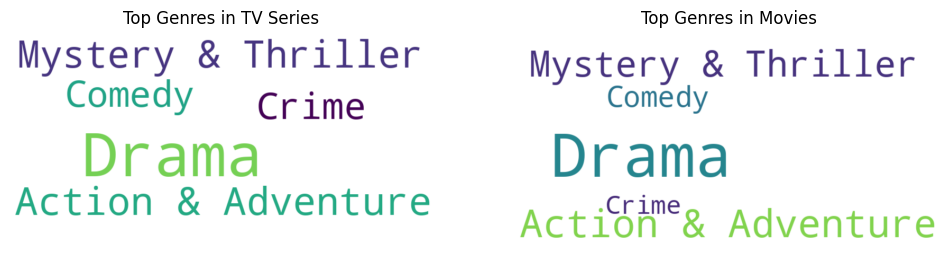

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for TV series genres
wordcloud_series = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_genres_series)

# Generate a word cloud for movies genres
wordcloud_movies = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_genres_movies)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_series, interpolation='bilinear')
plt.title('Top Genres in TV Series')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Top Genres in Movies')
plt.axis('off')

plt.show()




```
`# This is formatted as code`
```

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
import pandas as pd
# Count the occurrences of each streaming service for movies
top_streaming_services_movies = movies_dataframe['Streaming Service'].value_counts().reset_index()
top_streaming_services_movies.columns = ['Streaming Service', 'Number of Movies']

# Count the occurrences of each streaming service for TV series
top_streaming_services_series = series_dataframe['Streaming Service'].value_counts().reset_index()
top_streaming_services_series.columns = ['Streaming Service', 'Number of TV Series']

# Display the top streaming services for movies
top_streaming_services_movies.head()

# # Display the top streaming services for TV series
top_streaming_services_series.head()


,Streaming Service,Number of TV Series
0,Netflix,31
1,Amazon Prime Video,16
2,Hotstar,13
3,Sony Liv,8
4,Streaming services not found,8


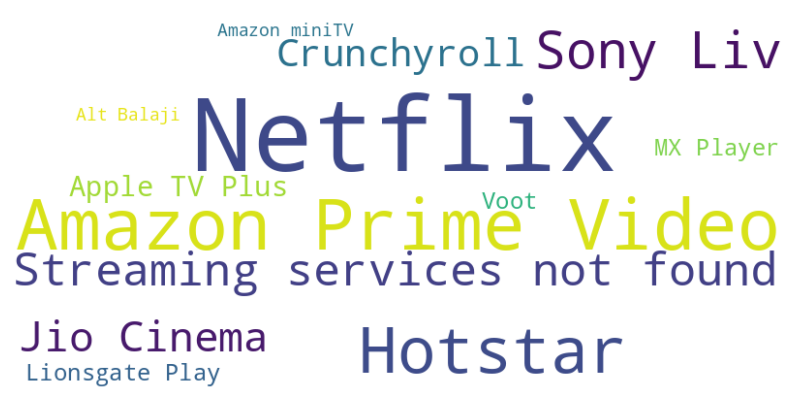

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the streaming services from movies and TV series dataframes
all_streaming_services = pd.concat([movies_dataframe['Streaming Service'], series_dataframe['Streaming Service']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(all_streaming_services.value_counts())

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
movies_dataframe.to_csv('Final_Data_of_Movies.csv', index=False)
series_dataframe.to_csv('Final_Data_of_Series.csv', index=False)

# Display success messages
print("Final Data of Movies saved successfully as 'Final_Data_of_Movies.csv'")
print("Final Data of Series saved successfully as 'Final_Data_of_Series.csv'")


Final Data of Movies saved successfully as 'Final_Data_of_Movies.csv'
Final Data of Series saved successfully as 'Final_Data_of_Series.csv'


In [ ]:
# Save filtered dataframes as CSV files
filtered_movies.to_csv('Filter_Data_of_Movies.csv', index=False)
filtered_series.to_csv('Filter_Data_of_Series.csv', index=False)

# Display success messages
print("Filter Data of Movies saved successfully as 'Filter_Data_of_Movies.csv'")
print("Filter Data of Series saved successfully as 'Filter_Data_of_Series.csv'")


Filter Data of Movies saved successfully as 'Filter_Data_of_Movies.csv'
Filter Data of Series saved successfully as 'Filter_Data_of_Series.csv'


# **Dataset Drive Link (View Access with Anyone) -** https://colab.research.google.com/drive/1zByxinj3ZpiXlrpLYFbXy7dr90ofI-0O?usp=sharing


# ***Congratulations!!! You have completed your Assignment.***

**Analysis by -Jonty Dutta**

**GitHub - https://github.com/JontyDutta**